In [1]:
# import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the data from csv file
df = pd.read_csv('loan.csv',encoding = "ISO-8859-1")
df.describe()

F:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [3]:
# calculate the missing values
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
print(missing_values)


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [4]:
# many columns have missing values , let us remove them
missing_values_columns = list(missing_values[missing_values >= 50].index)
print(missing_values_columns)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

In [5]:
# We will remove gthese columns
df=df.drop(missing_values_columns, axis=1)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [6]:
# print missign values in remaining columns
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
print(missing_values)


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [7]:
# we will also drop 'desc 'column
df = df.drop('desc',axis=1)


In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# we will now try to identify no.of unique values in each column which have categorical data
print("emp_length",df.emp_length.unique())
print("collections_12_mths_ex_med",df.collections_12_mths_ex_med.unique())
print("chargeoff_within_12_mths",df.chargeoff_within_12_mths.unique())
print("pub_rec_bankruptcies",df.pub_rec_bankruptcies.unique())
print("tax_liens",df.tax_liens.unique())

emp_length ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
collections_12_mths_ex_med [ 0. nan]
chargeoff_within_12_mths [ 0. nan]
pub_rec_bankruptcies [ 0.  1.  2. nan]
tax_liens [ 0. nan]


In [10]:
# here we remove the columns with nan values
df = df.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],axis=1)
df.shape

(39717, 50)

In [11]:
missing_values = round(100*(df.isnull().sum()/len(df.id)), 2)
print(missing_values)


id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
pymnt_plan                 0.00
url                        0.00
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_ac

In [12]:
# remove all the null values rows
df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]
df=df[~df.last_credit_pull_d.isnull()]
df=df[~df.pub_rec_bankruptcies.isnull()]





In [13]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0,0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,0.00,0.00,May-16,1313.76,May-16,1,INDIVIDUAL,0,0,0.0


In [14]:
# identify unique values in all columns
df.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [15]:
# drop the columns which have only 1 value
df = df.drop(['acc_now_delinq', 'application_type', 'policy_code','initial_list_status','delinq_amnt','pymnt_plan'],axis=1)
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [16]:
df.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

In [17]:
# drop the columns which have all unique values
df = df.drop(['id','member_id','funded_amnt','funded_amnt_inv','url','zip_code'],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [18]:
# we nedd to round off values which have more decimal places
df.collection_recovery_fee= round(df.collection_recovery_fee,2)


In [19]:

df.total_pymnt= round(df.total_pymnt,2)
df.total_rec_late_fee= round(df.total_rec_late_fee,2)

In [20]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [21]:
# convert all date columns to datetime format
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

In [22]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [23]:
# drop dupicate entries in rows
df=df.drop_duplicates()


In [24]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [25]:
# removing % sign in columns 
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [26]:
# replace emp_length column with values
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}


df = df.replace({"emp_length": emp_length_dict })
df.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [27]:
df.to_csv('MASTER2.csv', encoding='ISO-8859-1', index=False)

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


In [29]:
# here we remove the rows which are current as they will not help in our analysis
df=df[df.loan_status!= 'Current']


In [30]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0
7,3000,36 months,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,3939.14,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36 months,10.91,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,...,1161.29,12375.00,1995.92,0.00,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0
39562,4800,36 months,10.28,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,...,1176.56,4800.00,334.09,0.00,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0
39623,9000,36 months,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,...,311.64,1496.83,609.26,0.00,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0
39666,15450,36 months,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,...,451.73,8688.59,2659.96,0.00,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0


In [31]:
# import libaraies to plot graphs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')


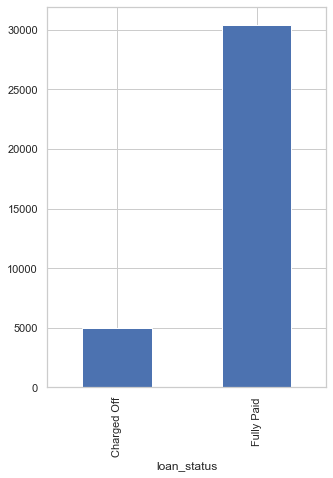

In [111]:
# Plot loan_stastus vs sum of loan amount for each
plt.figure(figsize=(5,7))
ax = df.groupby('loan_status').loan_amnt.count().plot.bar()
plt.show()

In [33]:
# % of charged off loans
print("%.2f" % (df.loc[df['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(df)))

13.98


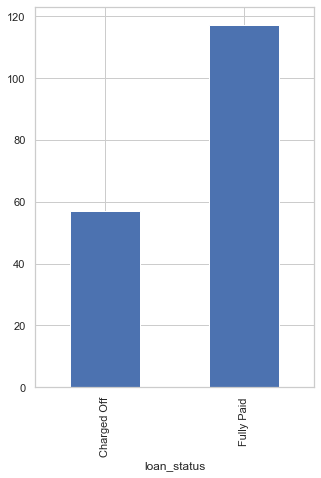

In [34]:
# Plot loan_stastus vs sum of loan amount for each in %

plt.figure(figsize=(5,7))
ax = (df.groupby('loan_status').total_pymnt.sum() * 100 / df.groupby('loan_status').loan_amnt.sum()).plot.bar()


In [35]:
df.groupby('loan_status')['loan_amnt'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


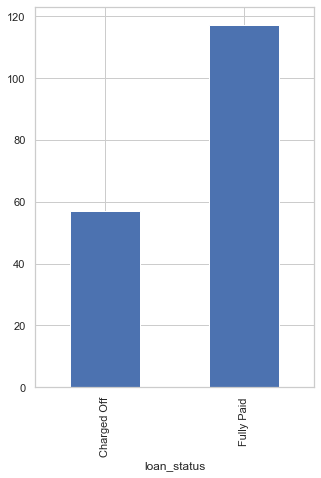

In [36]:
plt.figure(figsize=(5,7))
ax = (df.groupby('loan_status').total_pymnt.sum() * 100 / df.groupby('loan_status').loan_amnt.sum()).plot.bar()

In [37]:
# let us create a variable for the interval amount of loan 
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

In [38]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_bin
1,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0-5k
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,5-10k
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,0-5k
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,5-10k
7,3000,36 months,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,3000.00,939.14,0.00,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,0-5k


In [39]:
# create a column for loan status type
df['Charged_Off'] = [ 1 if x == 'Charged Off' else 0 for x in df['loan_status']]

In [40]:
# ac lomn for total loans
df['total_loans'] = [ 1 for x in df['loan_status']]

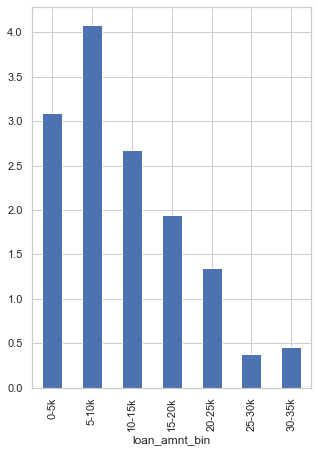

In [41]:
# plot loan interval range against  charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('loan_amnt_bin').Charged_Off.sum()*100  / df.total_loans.sum()).plot.bar()

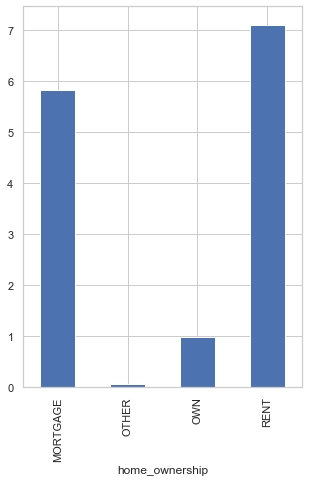

In [42]:
# Plot home_ownership vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('home_ownership').Charged_Off.sum()*100  / df.total_loans.sum()).plot.bar()

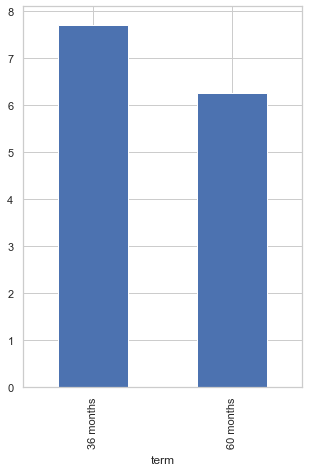

In [43]:
# Plot term vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('term').Charged_Off.sum()*100  / df.total_loans.sum()).plot.bar()

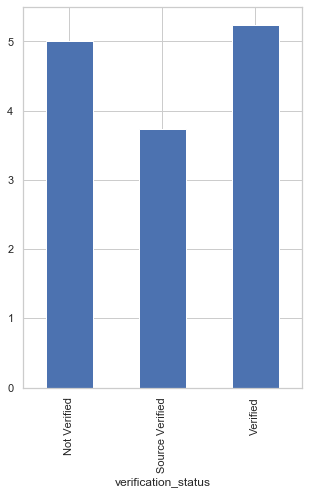

In [44]:
# Plot verification_status vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('verification_status').Charged_Off.sum()*100  / df.total_loans.sum()).plot.bar()

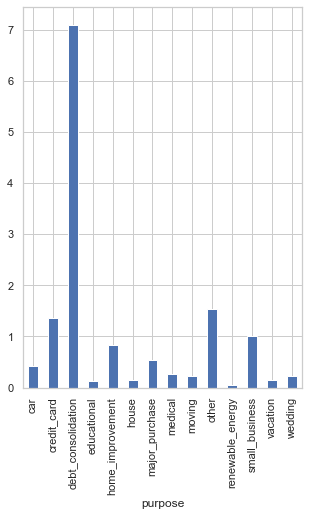

In [45]:
# Plot purpose vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('purpose').Charged_Off.sum()*100  / df.total_loans.sum()).plot.bar()

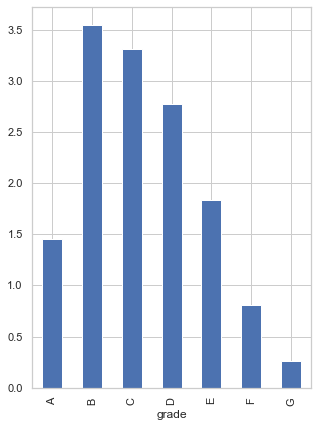

In [46]:
# Plot grade vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('grade').Charged_Off.sum()*100  / df.total_loans.sum()).plot.bar()

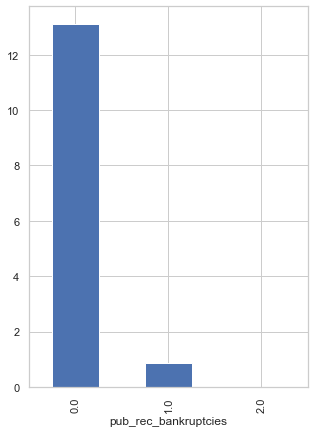

In [47]:
# Plot pub_rec_bankruptcies vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('pub_rec_bankruptcies').Charged_Off.sum()*100  / df.total_loans.sum()).plot.bar()

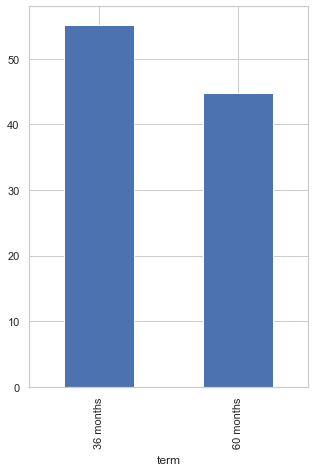

In [48]:
# Plot term vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('term').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

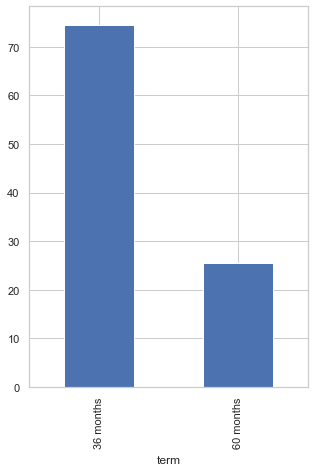

In [49]:
# Plot term vs % of total loans
plt.figure(figsize=(5,7))
ax = (df.groupby('term').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

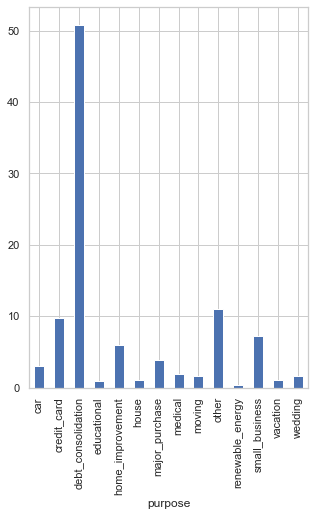

In [50]:
# Plot purpose vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('purpose').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

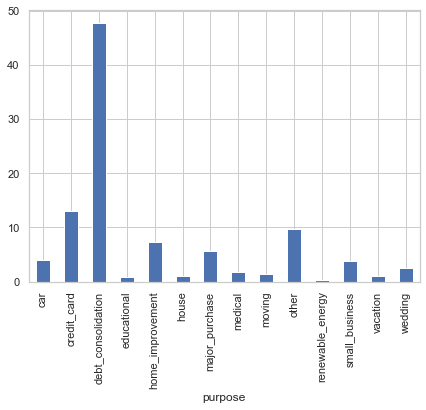

In [113]:
# Plot purpose vs % of total loans
plt.figure(figsize=(7,5))
ax = (df.groupby('purpose').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

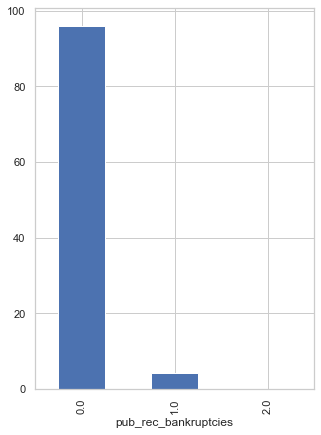

In [52]:
# Plot pub_rec_bankruptcies vs % of total loans
plt.figure(figsize=(5,7))
ax = (df.groupby('pub_rec_bankruptcies').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

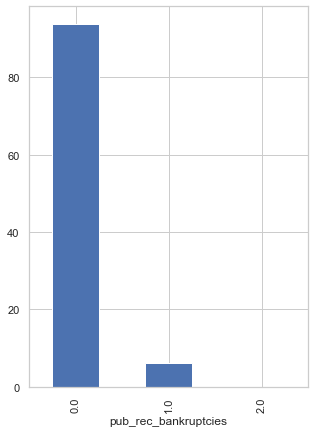

In [53]:
# Plot pub_rec_bankruptcies vs % charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('pub_rec_bankruptcies').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

In [54]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


In [55]:
# round off int_rate
df['interest_rate_buckets'] = round(df['int_rate'])

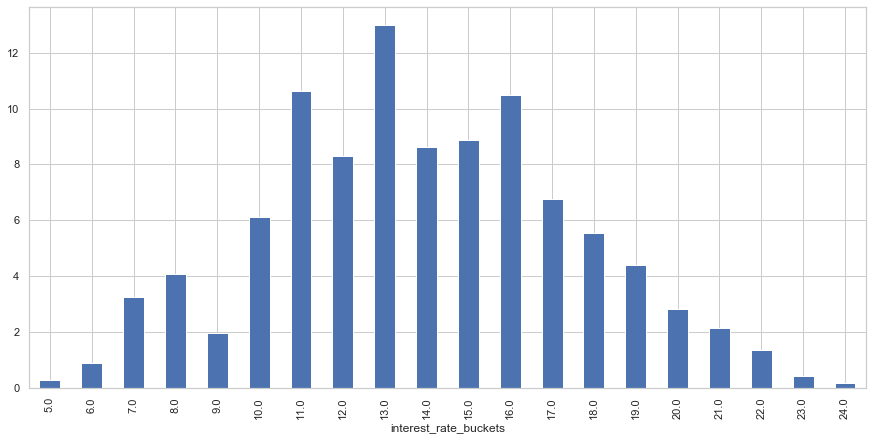

In [56]:
# Plot interest_rate_buckets vs % charged off loans
plt.figure(figsize=(15,7))
ax = (df.groupby('interest_rate_buckets').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

In [57]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


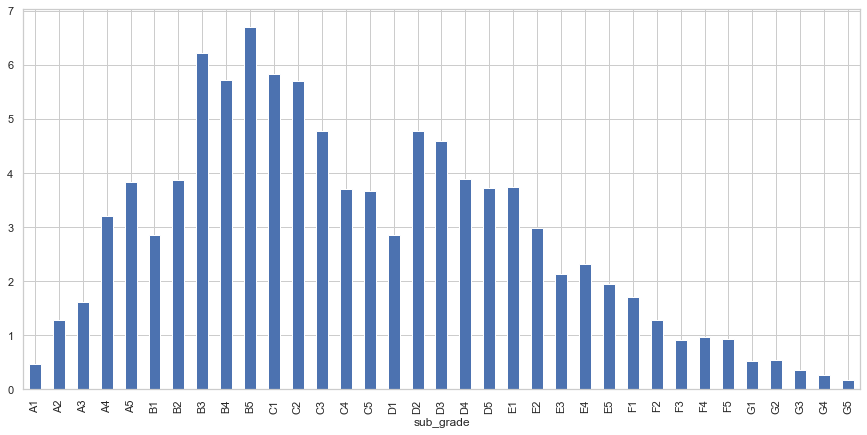

In [58]:
# Plot sub_grade vs % charged off loans
plt.figure(figsize=(15,7))
ax = (df.groupby('sub_grade').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

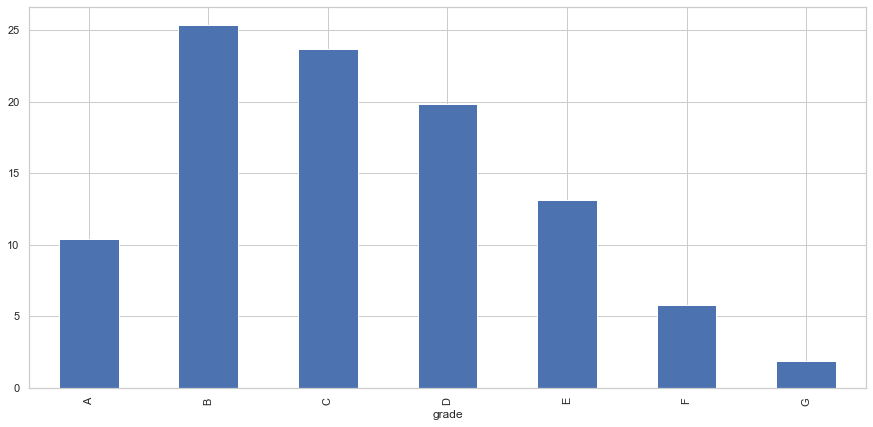

In [59]:
# Plot grade vs % charged off loans
plt.figure(figsize=(15,7))
ax = (df.groupby('grade').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

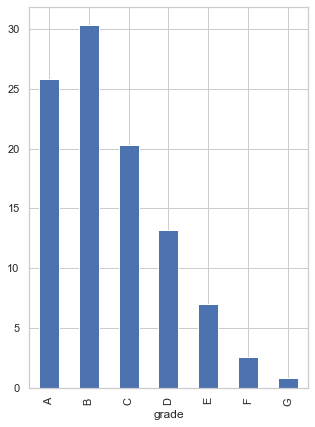

In [60]:
# Plot grade vs % of total loans
plt.figure(figsize=(5,7))
ax = (df.groupby('grade').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

In [61]:
df['interest_rate_buckets'] = round(df['int_rate'])


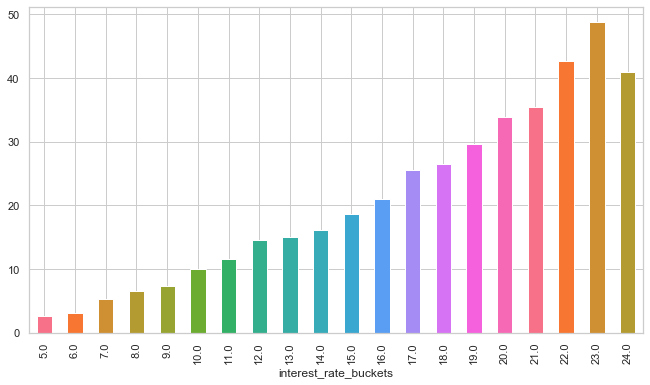

In [116]:
# plot % charged off loans for each interest_rate_buckets
plt.figure(figsize=(11,6))
group = df.groupby(['loan_status','interest_rate_buckets'])['interest_rate_buckets'].count()
count = df.groupby('interest_rate_buckets')['interest_rate_buckets'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

In [63]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_amnt_bin,Charged_Off,total_loans,interest_rate_buckets
1,2500,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0-5k,1,1,15.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,5-10k,0,1,13.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,0-5k,0,1,8.0
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,5-10k,0,1,16.0
7,3000,36 months,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,0-5k,0,1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36 months,10.91,404.62,C,C3,Fullmoon Software,2,RENT,80000.0,...,0.00,0.00,2010-02-01,4259.11,2014-05-01,1.0,10-15k,0,1,11.0
39562,4800,36 months,10.28,155.52,C,C1,E.E. Wine Inc,1,RENT,35000.0,...,0.00,0.00,2008-08-01,3891.08,2008-08-01,1.0,0-5k,0,1,10.0
39623,9000,36 months,12.49,301.04,D,D3,Maximus,8,MORTGAGE,39000.0,...,1909.87,668.36,2008-05-01,301.05,2016-05-01,1.0,5-10k,1,1,12.0
39666,15450,36 months,11.22,507.46,C,C4,ARIN,2,MORTGAGE,40000.0,...,304.20,3.09,2009-10-01,1016.15,2010-03-01,1.0,15-20k,1,1,11.0


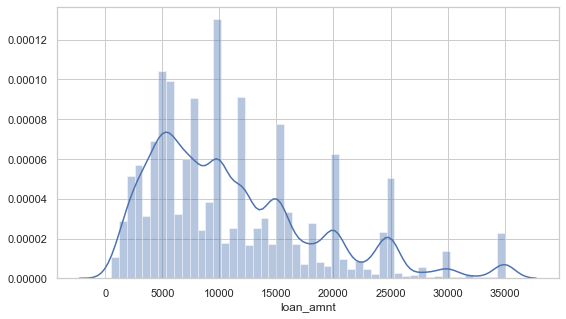

In [138]:
# distplot for loan_amnt
plt.figure(figsize=(9,5))
ax = sns.distplot(df['loan_amnt'])


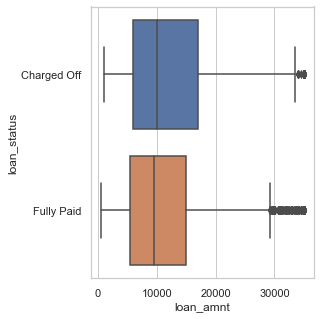

In [139]:
# boxplot
plt.figure(figsize=(4,5))
sns.boxplot(x=df['loan_amnt'], y=df['loan_status'], data=df)


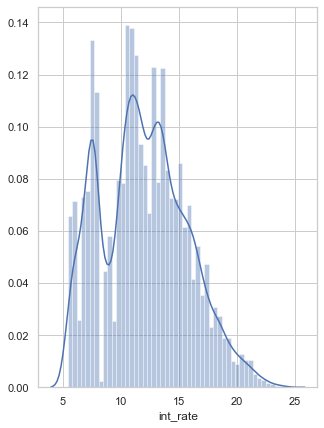

In [66]:
# distplot of int_rate
plt.figure(figsize=(5,7))
ax = sns.distplot(df['int_rate'])

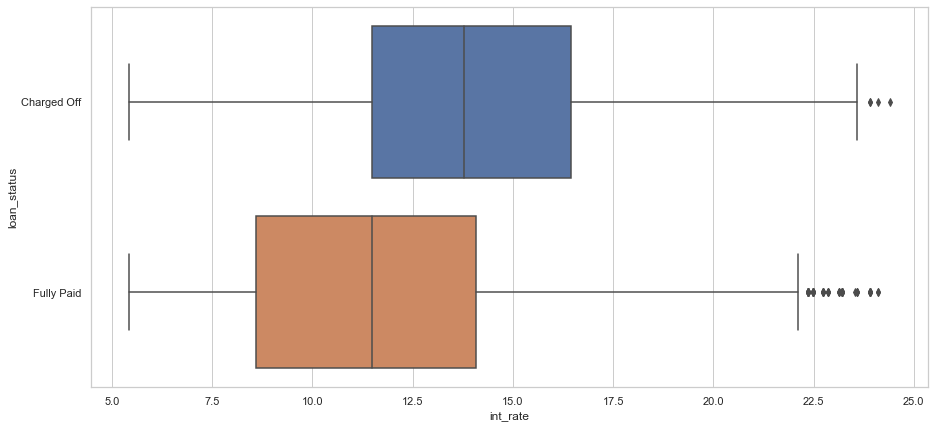

In [67]:
# boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x=df['int_rate'], y=df['loan_status'], data=df)

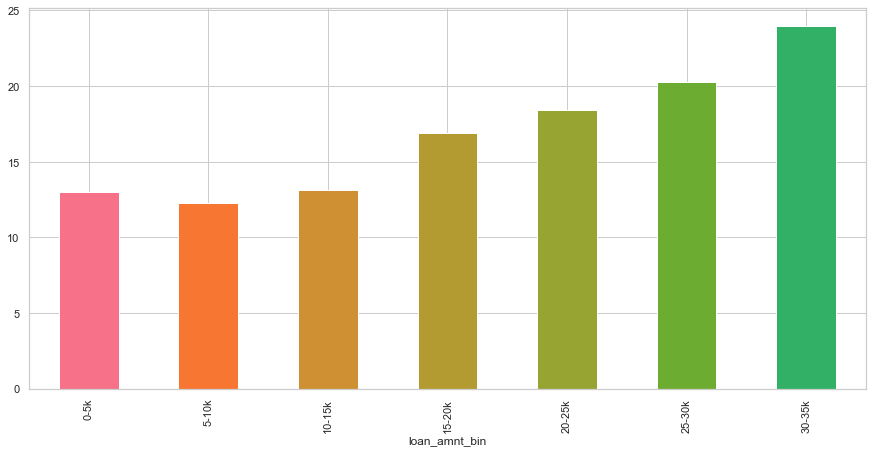

In [68]:

# plot % charged off loans for each loan_amnt_bin
plt.figure(figsize=(15,7))
group = df.groupby(['loan_status','loan_amnt_bin'])['loan_amnt_bin'].count()
count = df.groupby('loan_amnt_bin')['loan_amnt_bin'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

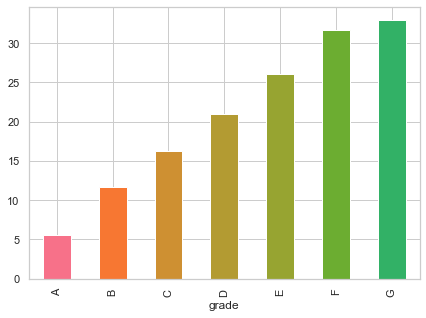

In [115]:
# plot % charged off loans for each grade

plt.figure(figsize=(7,5))
group = df.groupby(['loan_status','grade'])['grade'].count()
count = df.groupby('grade')['grade'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

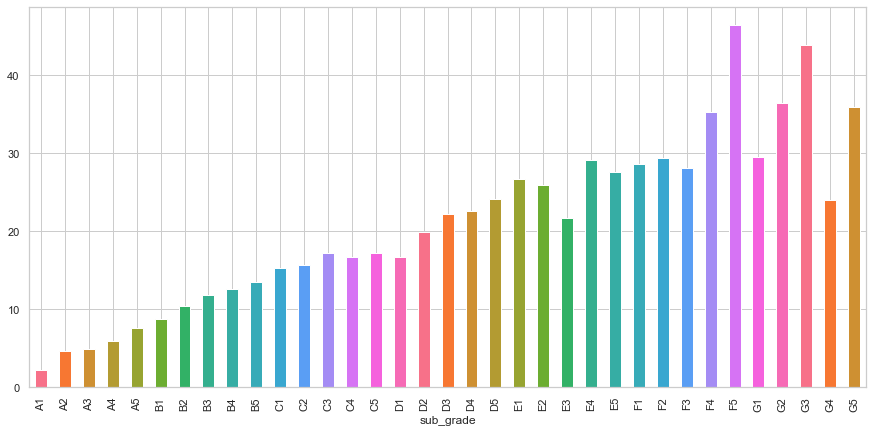

In [70]:
# plot % charged off loans for each sub_grade

plt.figure(figsize=(15,7))
group = df.groupby(['loan_status','sub_grade'])['sub_grade'].count()
count = df.groupby('sub_grade')['sub_grade'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

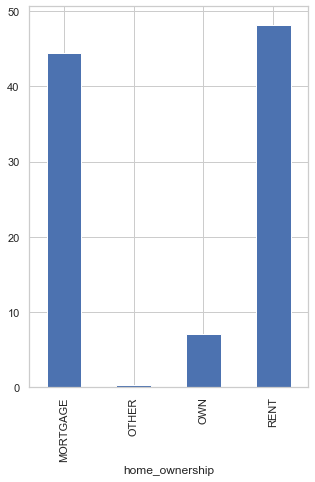

In [71]:
# plot for home_ownership vs % of total loans
plt.figure(figsize=(5,7))
ax = (df.groupby('home_ownership').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

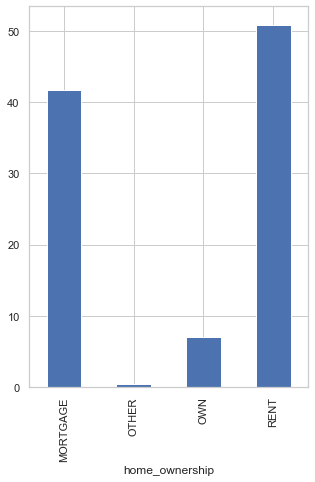

In [74]:
# plot for home_ownership vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('home_ownership').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

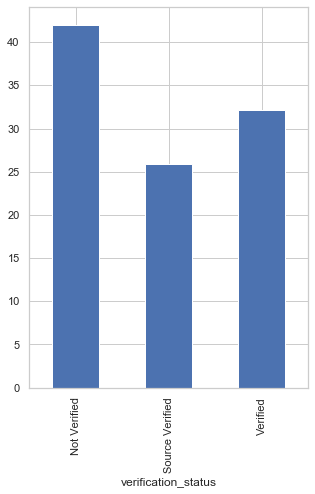

In [75]:

# plot for verification_status vs % of total loans
plt.figure(figsize=(5,7))
ax = (df.groupby('verification_status').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

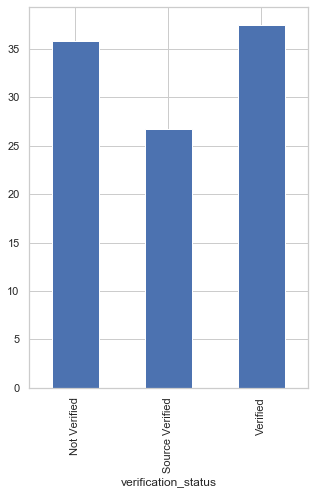

In [77]:
# plot for verification_status vs % of charged off loans
plt.figure(figsize=(5,7))
ax = (df.groupby('verification_status').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

In [79]:
# extract month and year
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['year'], df['month'] = df['issue_d'].dt.year, df['issue_d'].dt.month

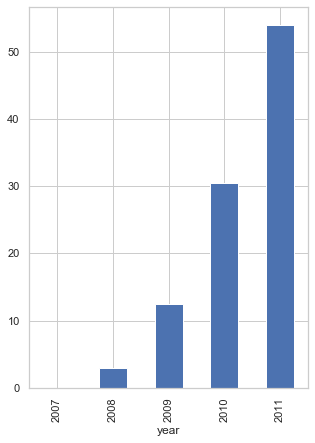

In [80]:
# plot for year vs % of total loans

plt.figure(figsize=(5,7))
ax = (df.groupby('year').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

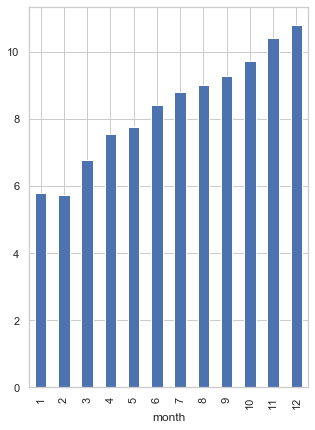

In [81]:
# plot for month vs % of total loans
plt.figure(figsize=(5,7))
ax = (df.groupby('month').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

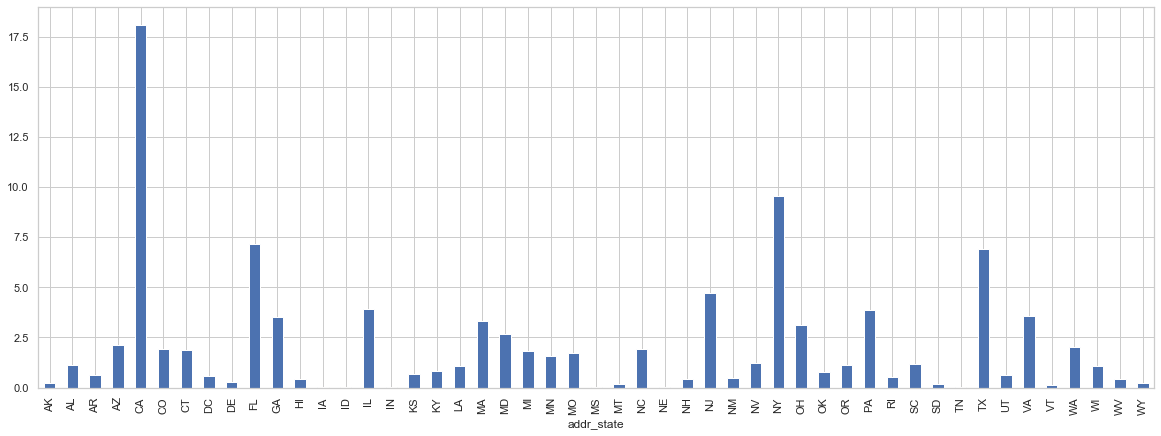

In [83]:

# plot for addr_state vs % of total loans
plt.figure(figsize=(20,7))
ax = (df.groupby('addr_state').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

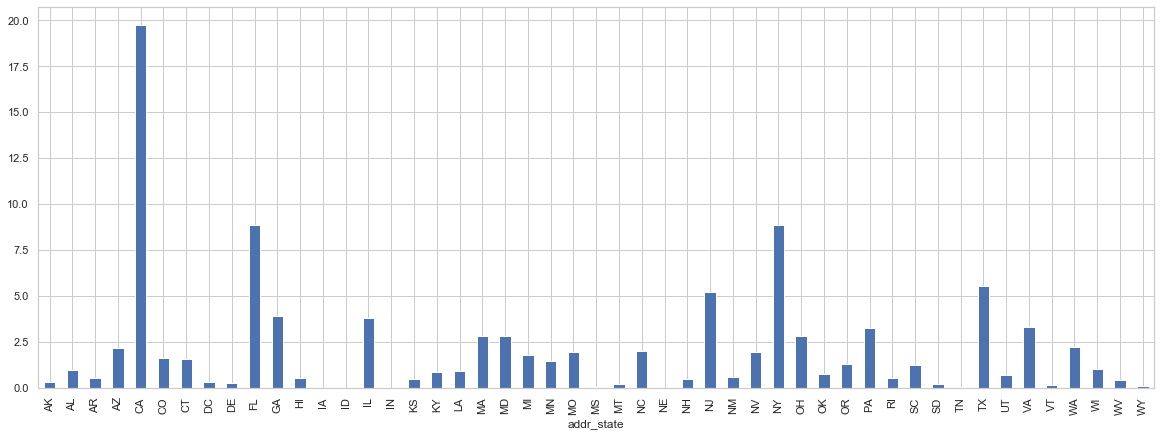

In [85]:
# plot for year vs % of charged off loans

plt.figure(figsize=(20,7))
ax = (df.groupby('addr_state').Charged_Off.sum()*100  / df.Charged_Off.sum()).plot.bar()

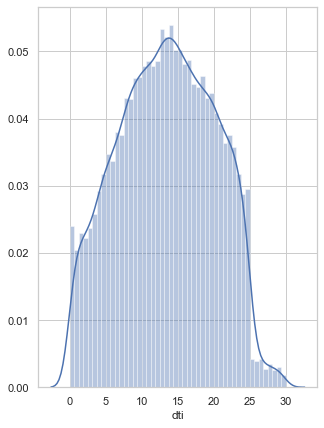

In [86]:
# displot for dti ratio
plt.figure(figsize=(5,7))
ax = sns.distplot(df['dti'])

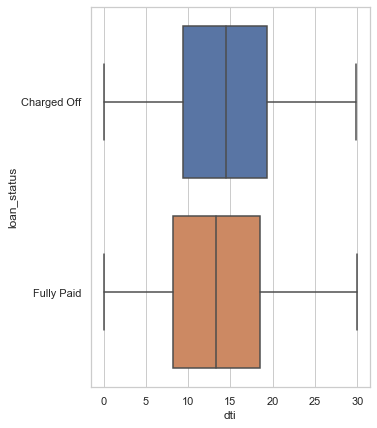

In [87]:
# boxplot
plt.figure(figsize=(5,7))
sns.boxplot(x=df['dti'], y=df['loan_status'], data=df)

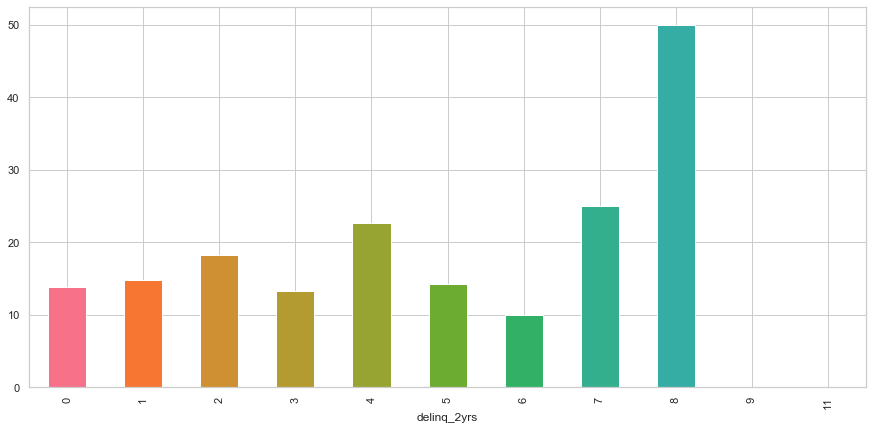

In [88]:
# plot % charged off loans for each delinq_2yrs

plt.figure(figsize=(15,7))
group = df.groupby(['loan_status','delinq_2yrs'])['delinq_2yrs'].count()
count = df.groupby('delinq_2yrs')['delinq_2yrs'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

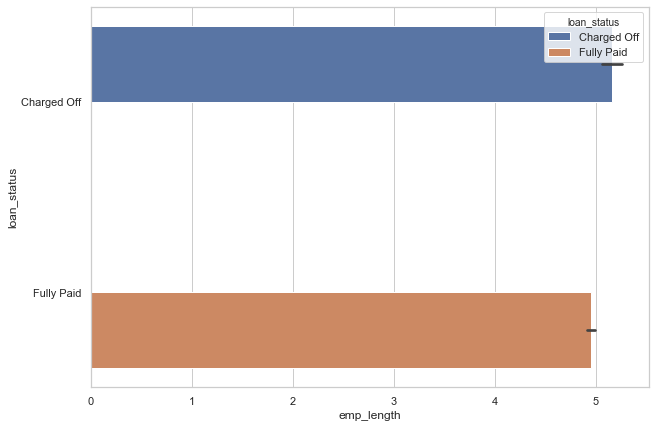

In [93]:
plt.figure(figsize=(10,7))
sns.barplot(x='emp_length', y='loan_status', hue="loan_status", data=df, estimator=np.mean)
plt.show()

In [96]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year

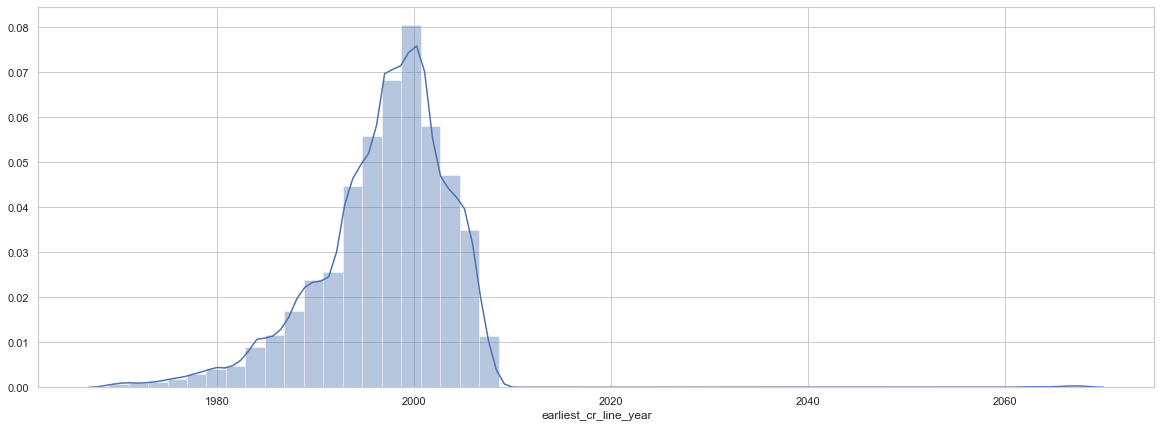

In [98]:
plt.figure(figsize=(20,7))
ax = sns.distplot(df['earliest_cr_line_year'])

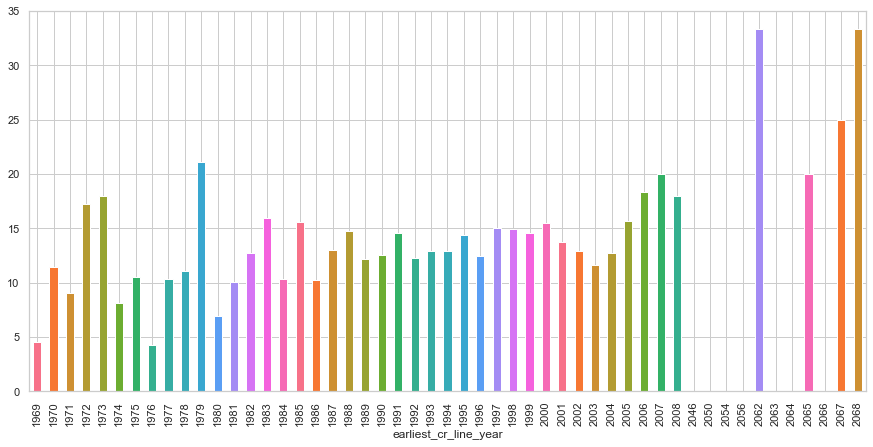

In [99]:
# plot % charged off loans for each earliest_cr_line_year

plt.figure(figsize=(15,7))
group = df.groupby(['loan_status','earliest_cr_line_year'])['earliest_cr_line_year'].count()
count = df.groupby('earliest_cr_line_year')['earliest_cr_line_year'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

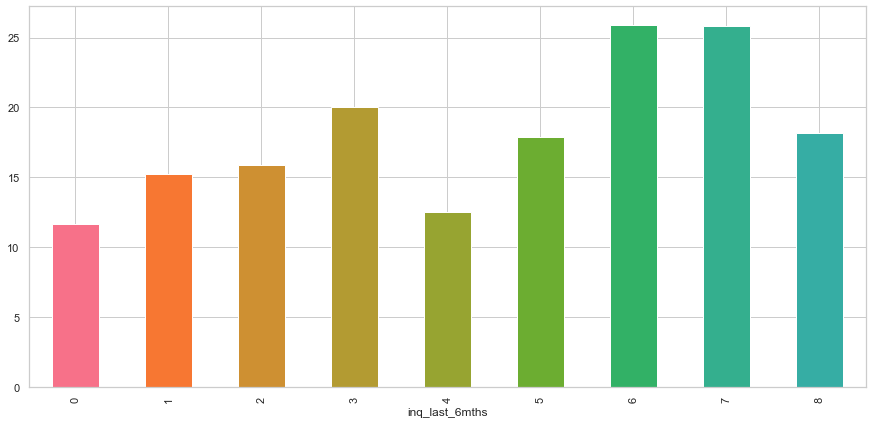

In [100]:
# plot % charged off loans for each inq_last_6mths

plt.figure(figsize=(15,7))
group = df.groupby(['loan_status','inq_last_6mths'])['inq_last_6mths'].count()
count = df.groupby('inq_last_6mths')['inq_last_6mths'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

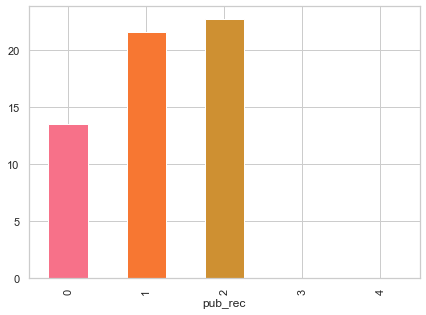

In [134]:
# plot % charged off loans for each pub_rec

plt.figure(figsize=(7,5))
group = df.groupby(['loan_status','pub_rec'])['pub_rec'].count()
count = df.groupby('pub_rec')['pub_rec'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

In [102]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year

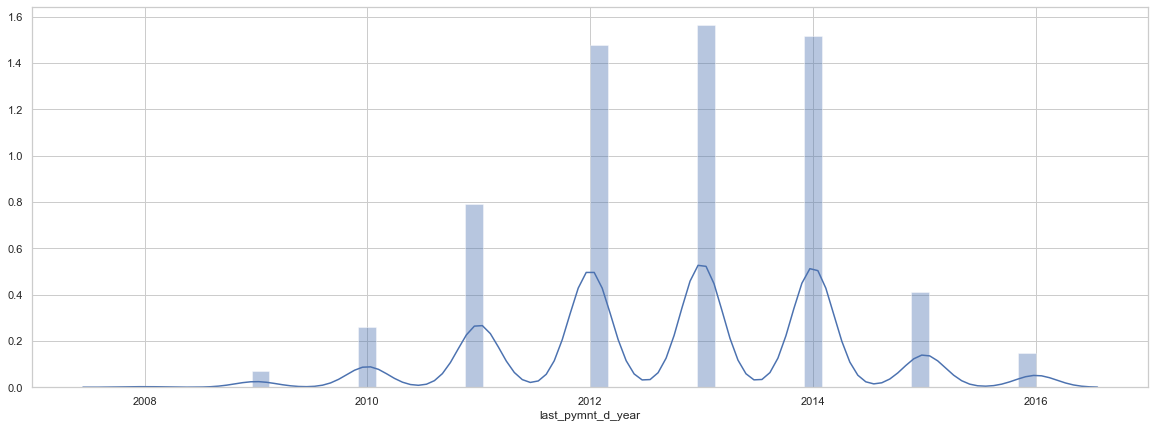

In [103]:
plt.figure(figsize=(20,7))
ax = sns.distplot(df['last_pymnt_d_year'])

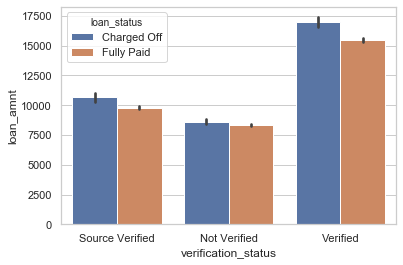

In [104]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)

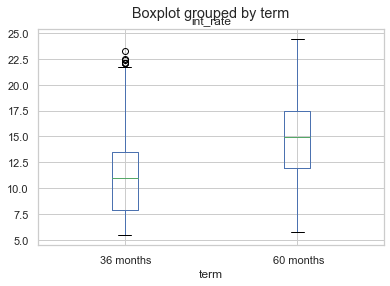

In [105]:
df.boxplot(column='int_rate', by='term')
plt.show()

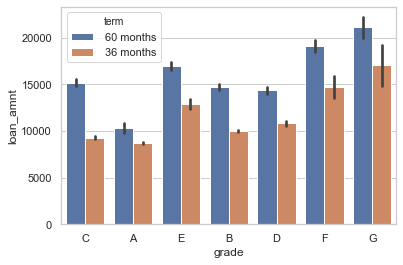

In [106]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df, estimator=np.mean)
plt.show()

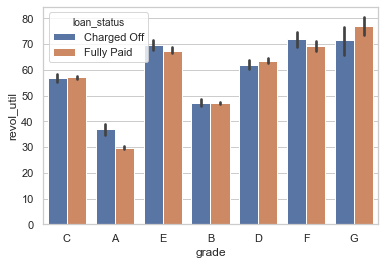

In [108]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=df, estimator=np.mean)
plt.show()

In [109]:
# correaltion matrix
corr=df.corr()
corr['loan_amnt']


loan_amnt                  1.000000
int_rate                   0.299997
installment                0.930743
emp_length                 0.144922
annual_inc                 0.258984
dti                        0.063093
delinq_2yrs               -0.035290
inq_last_6mths             0.010000
open_acc                   0.174265
pub_rec                   -0.046942
revol_bal                  0.319781
revol_util                 0.067081
total_acc                  0.255773
out_prncp                       NaN
out_prncp_inv                   NaN
total_pymnt                0.884286
total_pymnt_inv            0.860199
total_rec_prncp            0.848788
total_rec_int              0.728815
total_rec_late_fee         0.046662
recoveries                 0.143550
collection_recovery_fee    0.079357
last_pymnt_amnt            0.477646
pub_rec_bankruptcies      -0.030431
Charged_Off                0.063441
total_loans                     NaN
interest_rate_buckets      0.299979
year                       0

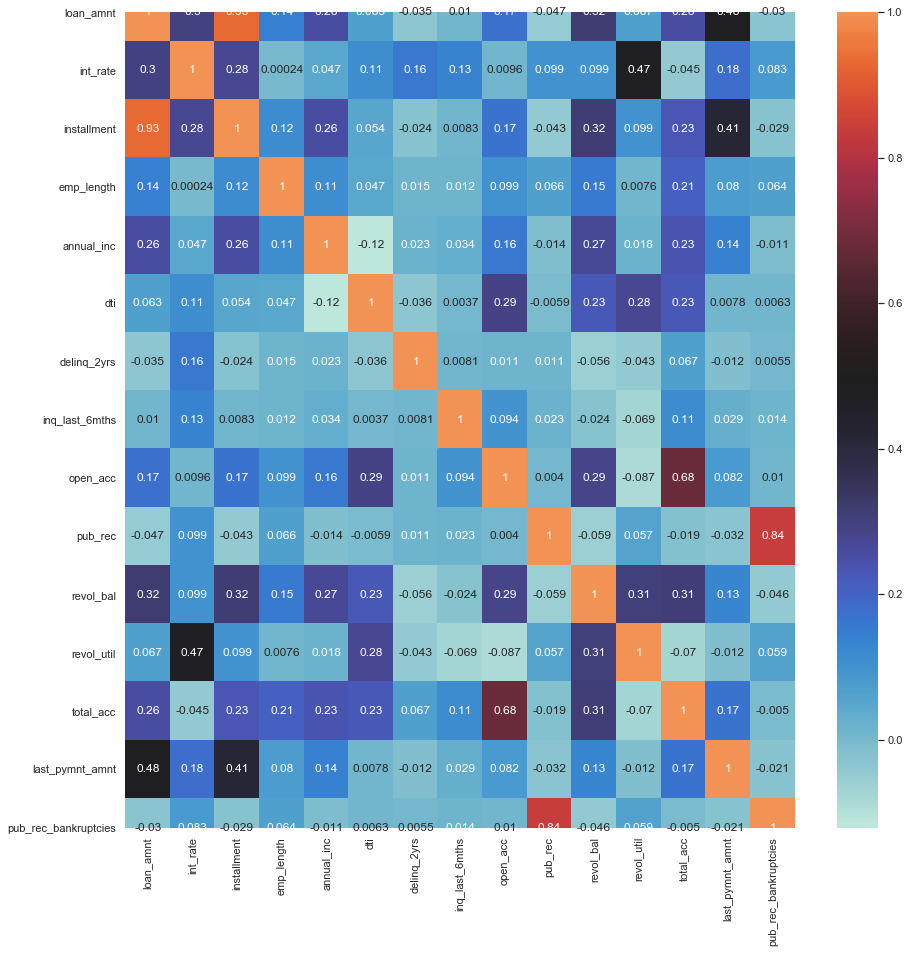

In [110]:

plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

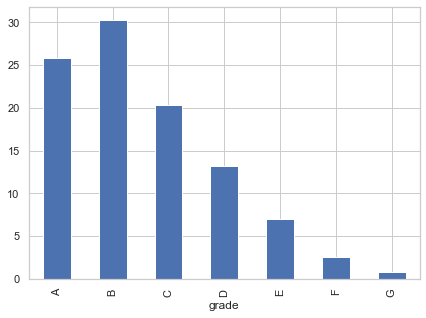

In [114]:
plt.figure(figsize=(7,5))
ax = (df.groupby('grade').total_loans.sum()*100  / df.total_loans.sum()).plot.bar()

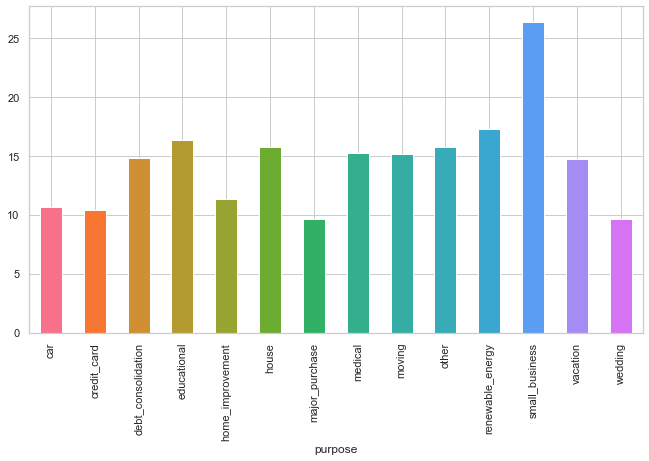

In [118]:
# plot % charged off loans for each purpose

plt.figure(figsize=(11,6))
group = df.groupby(['loan_status','purpose'])['purpose'].count()
count = df.groupby('purpose')['purpose'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

In [128]:

#Create Derived categorical variable
df['income_buc'] = df['annual_inc']/20000
df['income_buc'] = df['income_buc'].astype(int)

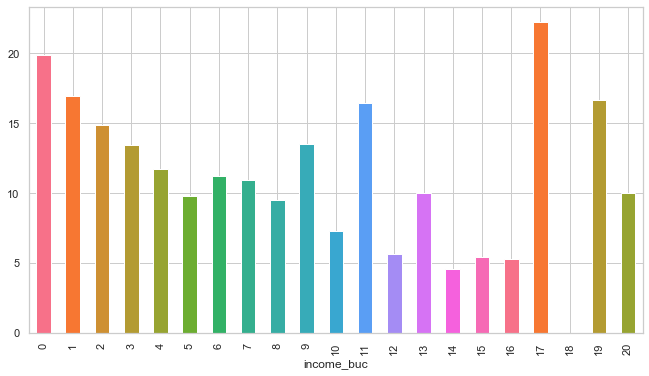

In [129]:
# plot % charged off loans for each income_buc
plt.figure(figsize=(11,6))
group = df.loc[df['income_buc']<21].groupby(['loan_status','income_buc'])['income_buc'].count()
count = df.loc[df['income_buc']<21].groupby('income_buc')['income_buc'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

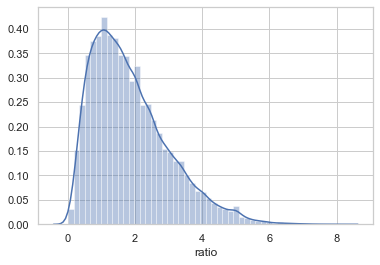

In [130]:

df['ratio'] = df['loan_amnt'] * 10 / df['annual_inc']
sns.distplot(df['ratio'])

In [131]:
df['ratio_buc'] = (df['ratio'].astype(int)) * 10

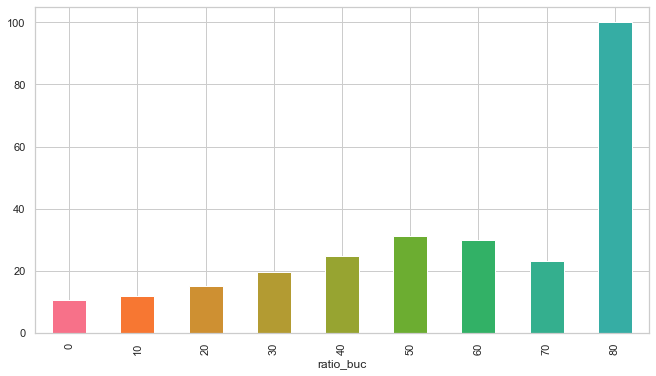

In [132]:
# plot % charged off loans for each ratio_buc
plt.figure(figsize=(11,6))
group = df.groupby(['loan_status','ratio_buc'])['ratio_buc'].count()
count = df.groupby('ratio_buc')['ratio_buc'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

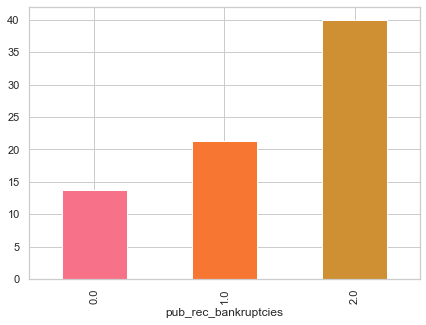

In [135]:
# plot % charged off loans for each pub_rec_bankruptcies

plt.figure(figsize=(7,5))
group = df.groupby(['loan_status','pub_rec_bankruptcies'])['pub_rec_bankruptcies'].count()
count = df.groupby('pub_rec_bankruptcies')['pub_rec_bankruptcies'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))

In [136]:
df['dti_buc'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

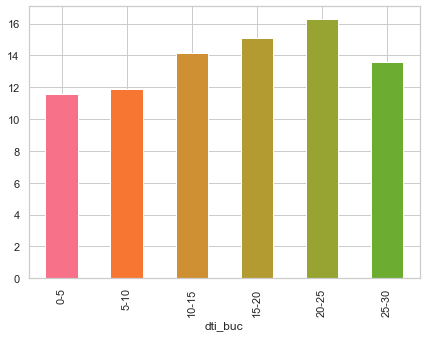

In [137]:
# plot % charged off loans for each dti_buc

plt.figure(figsize=(7,5))
group = df.groupby(['loan_status','dti_buc'])['dti_buc'].count()
count = df.groupby('dti_buc')['dti_buc'].count()
percentages = group.unstack() * 100 / count.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))